Initialize Libraries for Pandas and NLTK

In [8]:
#Import required libraries :
import pandas as pd

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize


import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

Read the CSV file with the Data from the Cloud

Reduce the size of the Dataframe, because of the issue with running out of RAM

In [9]:
#get the Data used :
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

Data2 = Data.sample(frac=0.1, replace=True)


Display portions of the DataFrame for visual insepection of the Data

Data Set Description:

Formally, given sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist.

id : The id associated with the tweets in the given dataset.

tweets : The tweets collected from various sources and having either positive or negative sentiments associated with it.

label : A tweet with label ‘0’ is of positive sentiment while a tweet with label ‘1’ is of negative sentiment

In [10]:
Data2

,id,label,tweet
20045,20046,1,white nationalist leader reveals 5 of his most...
19986,19987,0,@user yours was better because on the road to ...
17777,17778,0,anton yelchin rip dude #star #starek #trek #st...
25,26,0,beautiful sign by vendor 80 for $45.00!! #upsi...
15264,15265,0,holiday in 2 days âï¸ð¹ð¨âð©âð§...
...,...,...,...
18465,18466,0,@user apparently he's not. @user
25902,25903,0,so earlier i had a garage sale in front of my ...
4812,4813,0,i'm woh every dime. bihday #aloneonmybihday ...
8840,8841,0,another game and @user benched agan


Clean the data:

We are going to remove Stop words

We are going to remove "words" which are not alphabetic

We are going to remove "word" which are not in the english language

We are boing Lemmatize the "words" to their root.

In [11]:
#Import Libraries
from nltk.corpus import stopwords
from nltk.corpus import  wordnet
from nltk import WordNetLemmatizer

#Add column to Dataframe of tweet broken down into "words"
Data2['tWords'] = Data2.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)

#Copy the words to a list
lstWords = Data2['tWords'].tolist()

#Copy the entire tweet to list, will replace with normalize sentence
lstSentences = Data2['tweet'].tolist()

#Define Stop words
stopwords = stopwords.words("english")

#Init Lemmatizer
lemma = WordNetLemmatizer()

lstAllWords = []

#Loop through the Dataelements
for x in range(len(lstWords)):
  #List of words to add back to the Dataframe
  words_no_punc = []
  #Sentence to add back to the Dataframe
  txtSentence = ''

  #Loop through the list of words for the sentence
  for w in lstWords[x]:
    # is it alphabetic
    if w.isalpha():
      # is it not a stop word
      if w not in stopwords:
        # is the word in english
        if wordnet.synsets(w):
          #Yes to all, now we are going to add the lemmatize word to the list of words and sentence
          words_no_punc.append(lemma.lemmatize(w ,pos="v"))
          txtSentence = txtSentence + w + ' '

  #Update list value
  lstWords[x] = words_no_punc
  lstSentences[x] = txtSentence
  lstAllWords = lstAllWords + words_no_punc

#Update Dataframe
Data2['normilezedWords'] = lstWords
Data2['normilezedTweet'] = lstSentences


#Display Dataframe
Data2

print(lstAllWords)


['white', 'nationalist', 'leader', 'reveal', 'horrify', 'hop', 'america', 'usa', 'haters', 'user', 'user', 'better', 'road', 'title', 'make', 'rip', 'dude', 'star', 'trek', 'star', 'rip', 'legend', 'beautiful', 'sign', 'vendor', 'love', 'holiday', 'days', 'sun', 'sea', 'sand', 'greece', 'check', 'user', 'music', 'ukulele', 'background', 'fun', 'ad', 'positive', 'media', 'sister', 'ai', 'even', 'know', 'watch', 'argue', 'nigga', 'wait', 'say', 'wrong', 'shit', 'love', 'men', 'women', 'gift', 'quote', 'fuck', 'go', 'time', 'next', 'week', 'wad', 'mud', 'user', 'let', 'mission', 'new', 'commence', 'father', 'day', 'spend', 'morning', 'write', 'parser', 'bliss', 'geek', 'watch', 'krakow', 'beautiful', 'go', 'amp', 'stay', 'amp', 'let', 'us', 'build', 'love', 'amp', 'peace', 'uk', 'east', 'european', 'relatives', 'user', 'british', 'farm', 'summer', 'british', 'summer', 'farm', 'health', 'healthy', 'user', 'happiness', 'find', 'killer', 'bread', 'local', 'supermarket', 'healthy', 'user', 's

Show the disribution of the 10 most common words

In [14]:
#Import required libraries :
from nltk.probability import FreqDist

#Find the frequency :
fdist = FreqDist(lstAllWords)

#Print 10 most common words :
fdist.most_common(10)



[('user', 1821),
 ('love', 287),
 ('day', 209),
 ('get', 180),
 ('happy', 178),
 ('amp', 166),
 ('go', 137),
 ('time', 125),
 ('make', 121),
 ('like', 120)]

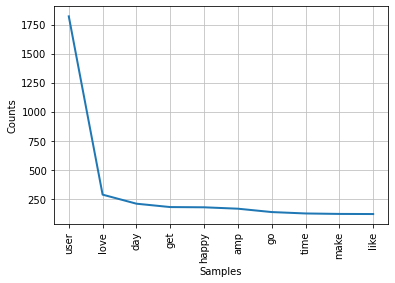

In [15]:
fdist.plot(10)

Make A word cloud

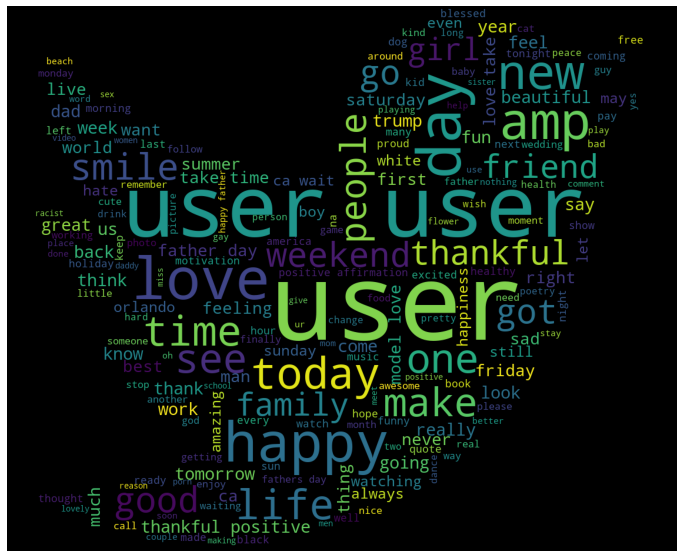

In [18]:
#Library to form wordcloud :
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import requests
from PIL import *

#Library to plot the wordcloud :
import matplotlib.pyplot as plt

# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

text = pd.Series(Data2.normilezedTweet).to_string()

#Generating the wordcloud :
wordcloud = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(text)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

Make Bag of Words

This part here is memory intensive and will consume all of the RAM if the data set is too large and crash Co Lab.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer


#Text for analysis :

sentences = Data2['normilezedTweet'].tolist()

#Create an object :
cv = CountVectorizer()

#Generating output for Bag of Words :
B_O_W = cv.fit_transform(sentences).toarray()



Run the Test on the Data

In [21]:
#Import svm model
from sklearn.model_selection import train_test_split
from sklearn import svm


X_train, X_test, y_train, y_test = train_test_split(B_O_W, Data2.label, test_size=0.3,random_state=109) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9395203336809176
